# (1566) Icarus propagation test

#### Let's start by importing the necessary libraries

In [1]:
from grss import prop, fit, utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=40, linewidth=np.inf)

#### We'll then retrieve the cometary state of the asteroid (from JPL SBDB) plus any nongravitational accelerations acting on it.

In [3]:
body_id = '1566'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)

In [4]:
t0 = init_sol['t']
e = init_sol['e']
q = init_sol['q']
tp = init_sol['tp']
om = init_sol['om']
w = init_sol['w']
i = init_sol['i']

cometary_elements = [e, q, tp, om, w, i]
ng_params = prop.NongravParameters()
ng_params.a1 = init_sol.get('a1', 0.0)
ng_params.a2 = init_sol.get('a2', 0.0)
ng_params.a3 = init_sol.get('a3', 0.0)
icarus = prop.IntegBody("(1566) Icarus", t0, 0.0, 0.0, cometary_elements, ng_params)

#### Let's choose the planetary kernels, final time, and initialize the simulation.

In [5]:
de_kernel = 440
de_kernel_path = utils.default_kernel_path
tf = t0 + 10 * 365.25
prop_sim = prop.PropSimulation("(1566) Icarus propagation test", t0, de_kernel, de_kernel_path)

#### We need to define the times at which we want to retrieve the state of the asteroid, plus some choices for the evaluated states:
- Whether we want to retrieve the geometric or apparent state of the asteroid.
- Whether the evaluation times are in the TDB or UTC time scale.
- Whether we want to use a converged light time solution if the apparent state is chosen.

In [6]:
t_temp = t0
t_eval = []
while t_temp <= tf:
    t_eval.append(t_temp)
    t_temp += 1.0

eval_apparent_state = False
t_eval_utc = False
converged_light_time = False
prop_sim.set_integration_parameters(tf, t_eval, t_eval_utc, eval_apparent_state, converged_light_time)

#### Finally, we add the asteroid to the simulation and propagate it.

In [7]:
prop_sim.add_integ_body(icarus)
prop_sim.integrate()

#### Plot the results

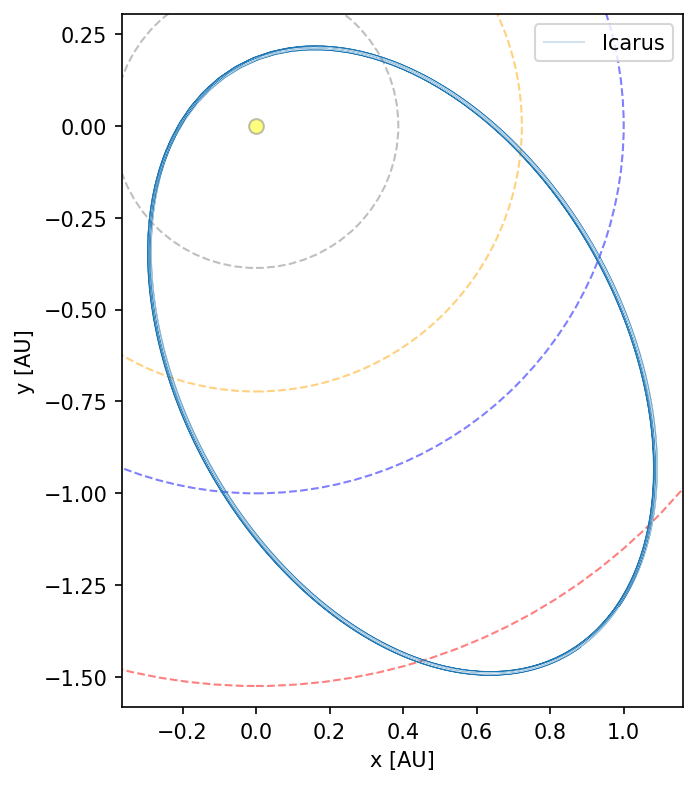

In [8]:
arr = np.array(prop_sim.xIntegEval)
# plot xy and xz projections of the orbit in a 2x1 subplot
plt.figure(figsize=(6, 6), dpi=150)
axs = plt.gca()
prop.plot_solar_system(axs, xy_plane=True, alpha=0.5)
axs.plot(arr[:,0], arr[:,1], '-', lw=0.2, label='Icarus')
axs.set_xlabel("x [AU]")
axs.set_ylabel("y [AU]")
axs.set_aspect('equal')
plt.legend()
plt.show(block=False)
plt.close()